## Universidad Politécnica Salesiana
#### Edith Guaraca C.
#### Inteligencia Artificial II

# ADALINE

 Es un tipo de red neuronal artificial desarrollada por el profesor Bernard Widrow y su alumno Ted Hoff en la Universidad de Stanford en 1960. El modelo está basado en la Neurona de McCulloch Pitts.


La red Adaline es muy parecida al perceptrón, excepto que en su función de transferencia es linear, en vez de ser escalón.

Adaline y perceptrón resuelven problemas lineamente separables.

Otras características:
* Es un tipo de aprendizaje OFF Line. 
* Se enmarca dentro del tipo de aprendizaje por corrección de error. 
* Se  utiliza  para  entrenar  un  Elemento  Simple  de  Procesado,  con  una  función  de  transferencia lineal. 
* Se  le  conoce  también  con  el  nombre  de  Regla  de Widrow-Hoff (Adaline:  Adaptive Linear Elemento). 

Generalmente se compone de una sola capa de n neuronas ( por tanto n valores de salida ) con m entradas con las siguientes características:

* Las m entradas representan un vector x de entrada que pertenece al espacio R^m.
* Por cada neurona, existe un vector w de pesos sinápticos que indican la fuerza de conexión entre los valores de entrada y la neurona. En la práctica representan la ponderación de cada entrada sobre la neurona.
* Una constante theta.
* La salida y de la neurona se representa por la función de activación, que se define como: 

![N|Solid](https://wikimedia.org/api/rest_v1/media/math/render/svg/e2b7005dc9a7c7ec143d3eb167d0991986b9704f)

#### Arquitectura de Adaline

![N|Solid](https://2.bp.blogspot.com/-BqJ9D1yOhQI/WQn-k-ZWc8I/AAAAAAAAAz8/hRzlL-hoxEwZZkLiyuEiTzfuyazHdF_GgCLcB/s1600/arqui_adaline.png)

#### Aplicaciones de Adaline
* Asociación de patrones: se puede aplicar a este tipo de problemas siempre que los patrones sean linealmente separables.

 En el campo del procesamiento de señales:
 

* Filtros de ruido: Limpiar ruido de señales transmisoras de información.
* Filtros adaptativos: Un adaline es capaz de predecir el valor de una señal en el instante t+1 si se conoce el valor de la misma en los p instantes anteriores (p es >0 y su valor depende del problema). El error de la predicción será mayor o menor según qué señal queramos predecir. Si la señal se corresponde a una serie temporal el Adaline, pasado un tiempo, será capaz de dar predicciones exactas.

Se pueden combinar múltiples Adalines formando lo que se denomina el Madaline.





### Aprendizaje

A diferencia del perceptrón, a la hora de modificar los pesos durante el entrenamiento, el Adaline tiene en cuenta el grado de corrección de la salida estimada respecto a la deseada. Esto se consigue mediante la aplicación de la regla Delta, y que se define, para un patrón de entrada x^p con una salida estimada y^p y una salida deseada d^p, como |d^{p}-y^{p}|.

Dado que el objetivo del Adaline es poder estimar de la manera más exacta la salida (conseguir una salida exacta es prácticamente imposible en la mayoría de los casos), se busca minimizar la desviación de la red para todos los patrones de entrada, eligiendo una medida del error global. Normalmente se utiliza el error cuadrático medio.

![N|Solid](https://wikimedia.org/api/rest_v1/media/math/render/svg/ac397cbbb7943dafda30417513d25865801b6870)

La manera de reducir este error global es ir modificando los valores de los pesos al procesar cada entrada, de forma iterativa, mediante la regla del descenso del gradiente. Suponiendo que tenemos una constante de aprendizaje alpha :

![N|Solid](https://wikimedia.org/api/rest_v1/media/math/render/svg/9ef1467ff271070cb5203f717dca8ac4dc126f91)

Si operamos con la derivada, queda:

![N|Solid](https://wikimedia.org/api/rest_v1/media/math/render/svg/ea6cbc4debe55e35d825bf0e8a3f9ebe89a386c8)

Que será la expresión que utilizaremos por cada entrada para modificar los pesos.

#### Ventajas
Con respecto al perceptrón el Adaline posee la ventaja de que su gráfica de error es un hiperparaboloide que posee o bien un único mínimo global, o bien una recta de infinitos mínimos, todos ellos globales. Esto evita la gran cantidad de problemas que da el perceptrón a la hora del entrenamiento debido a que su función de error (también llamada de coste) posee numerosos mínimos locales.

### Ejemplo 1

* Criterio 1: Fijar un número de ciclos máximo. Dicho número debe garantizar que el error cuadrático para los patrones de entrenamiento se haya estabilizado.
* Criterio 2: Cuando el error cuadrático sobre los patrones de entrenamiento no cambia durante x ciclos.
* Criterio 3: Cuando el error cuadrático sobre los patrones de validación no aumenta o se mantiene estable a lo largo de x ciclos.

Tenemos la siguiente red Neuronal:

<img src="adalinecapturas/adaline1.PNG">

Calculamos la función de activación:

![N|Solid](https://wikimedia.org/api/rest_v1/media/math/render/svg/e2b7005dc9a7c7ec143d3eb167d0991986b9704f)

<img src="ad1.PNG">

Dado que el objetivo del Adaline es poder estimar de la manera más exacta la salida (conseguir una salida exacta es prácticamente imposible en la mayoría de los casos), se busca minimizar la desviación de la red para todos los patrones de entrada, eligiendo una medida del error global. Normalmente se utiliza el error cuadrático medio.

<img src="adalinecapturas/ad2.PNG">

<img src="adalinecapturas/ad3.PNG">

La siguiente iteración:

<img src="adalinecapturas/ad21.PNG">

<img src="adalinecapturas/ad22.PNG">

<img src="adalinecapturas/ad24.PNG">

<img src="adalinecapturas/ad25.PNG">

<img src="adalinecapturas/ad31.PNG">

<img src="adalinecapturas/ad32.PNG">

<img src="adalinecapturas/ad33.PNG">

<img src="adalinecapturas/final.PNG">

In [38]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [39]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta=eta
        self.n_iter=n_iter
        
    def fit(self, X,y):
        self.w_ = np.zeros(1 +X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for Xi, target in zip(X,y):
                update = self.eta * (target-self.predict(Xi))
                self.w_[1:] += update*Xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >=0,1,-1)

In [40]:
df = pd.read_csv('/home/edith/Descargas/iris.csv', header=None)

In [41]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


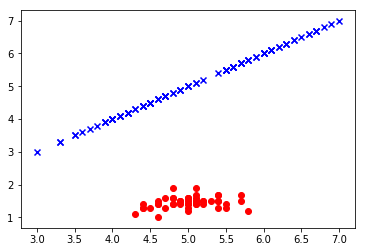

In [42]:
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100], X[50:100], color='blue', marker='x', label='versicolor')
plt.show()

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


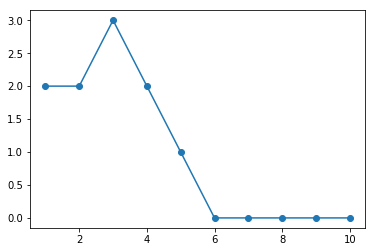

In [43]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
print(ppn.errors_)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.show()

In [44]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min,x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), np.arange(x2_min,x2_max,resolution))
    Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z =Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


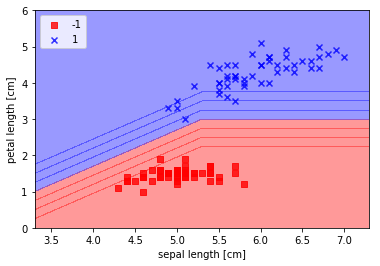

In [45]:
plot_decision_regions(X, y, classifier=ppn,resolution=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [46]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
       """Calculate net input"""
       return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
       """Compute linear activation"""
       return self.net_input(X)
    def predict(self, X):
       """Return class label after unit step"""
       return np.where(self.activation(X) >= 0.0, 1, -1)

/home/edith/.conda/envs/simulacion/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  


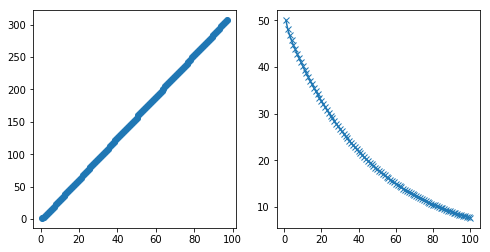

In [47]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ada1 = AdalineGD(n_iter=100).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_) +1),np.log10(ada1.cost_),marker='o')

ada2 = AdalineGD(n_iter=100,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) +1), (ada2.cost_),marker='x')
plt.show()

In [48]:
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std.mean() )/X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std.mean() )/X_std[:,1].std()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


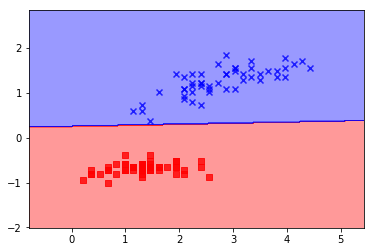

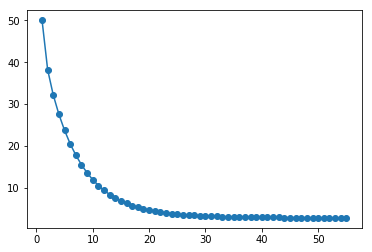

In [49]:
ada = AdalineGD(n_iter = 55,eta=0.001).fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.show()

Con respecto al perceptrón el Adaline posee la ventaja de que su gráfica de error es un hiperparaboloide que posee o bien un único mínimo global, o bien una recta de infinitos mínimos, todos ellos globales. Esto evita la gran cantidad de problemas que da el perceptrón a la hora del entrenamiento debido a que su función de error (también llamada de coste) posee numerosos mínimos locales.

### Bibliografía
* https://es.wikipedia.org/wiki/Adaline
* https://www.kaggle.com/nikhil04/intro-to-perceptron-and-adaline-linear-neuron/data?fbclid=IwAR27KVnOrwepKlpCuu8uSfRVYglOSax_ZmECB9K1tUumSST6Wfl2DF0lIs4
* http://rasbt.github.io/mlxtend/user_guide/classifier/Adaline/?fbclid=IwAR2RsAufkgB-np9vqU-cCznkRxvj2Vv9VBtCOpABydYQg90Ivb7QeLec1f0#adaptive-linear-neuron-adaline
* https://dianainteligenciaartificial.blogspot.com/2015/07/red-adaline.html?fbclid=IwAR3OJh6IG9jhphwfC9zKkL_JzEy7aaCr8JLzUH0tusx6aZ9zY8udK-VdQck